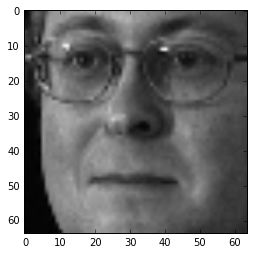

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import random
%matplotlib inline

data = []
n_train = []

data.append(sio.loadmat('./PIEdataset/Pose05_64x64.mat'))
data.append(sio.loadmat('./PIEdataset/Pose07_64x64.mat'))
data.append(sio.loadmat('./PIEdataset/Pose09_64x64.mat'))
data.append(sio.loadmat('./PIEdataset/Pose27_64x64.mat'))
data.append(sio.loadmat('./PIEdataset/Pose29_64x64.mat'))

n_train.append(data[0]['fea'].shape[0])
index = random.randint(0, n_train[0])
imgtest=data[0]['fea'][index].reshape(64,64)
plt.imshow(imgtest,'gray')

n_train.append(data[1]['fea'].shape[0])
n_train.append(data[2]['fea'].shape[0])
n_train.append(data[3]['fea'].shape[0])
n_train.append(data[4]['fea'].shape[0])

In [2]:
print(data[0]['isTest'][3329][0])

1.0


In [43]:
from sklearn.model_selection import train_test_split

x_train = []
y_train = []
x_valid = []
y_valid = []
x_test = []
y_test = []

for dat in range(5):
    for img in range(n_train[dat]):
        if data[dat]['isTest'][img][0] < 1.0:
            x_train.append(data[dat]['fea'][img].reshape(64,64,1))
            y_train.append(int(data[dat]['gnd'][img]))
        else:
            x_test.append(data[dat]['fea'][img].reshape(64,64,1))
            y_test.append(int(data[dat]['gnd'][img]))
            x_test.append(data[dat]['fea'][img].reshape(64,64,1))
            y_test.append(int(data[dat]['gnd'][img]))
            x_test.append(data[dat]['fea'][img].reshape(64,64,1))
            y_test.append(int(data[dat]['gnd'][img]))
            x_test.append(data[dat]['fea'][img].reshape(64,64,1))
            y_test.append(int(data[dat]['gnd'][img]))
            x_test.append(data[dat]['fea'][img].reshape(64,64,1))
            y_test.append(int(data[dat]['gnd'][img]))
            x_test.append(data[dat]['fea'][img].reshape(64,64,1))
            y_test.append(int(data[dat]['gnd'][img]))
            x_test.append(data[dat]['fea'][img].reshape(64,64,1))
            y_test.append(int(data[dat]['gnd'][img]))
            x_test.append(data[dat]['fea'][img].reshape(64,64,1))
            y_test.append(int(data[dat]['gnd'][img]))

            
x_train = np.array(x_train)
y_train = np.array(y_train)
y_train = y_train.reshape(10262,1)
x_test = np.array(x_test)
y_test = np.array(y_test)
y_test = y_test.reshape(10336,1)

In [44]:
x_test.shape

(10336, 64, 64, 1)

In [20]:
print(y_train)


[[ 1]
 [ 1]
 [ 1]
 ..., 
 [68]
 [68]
 [68]]


In [21]:
from keras.models import Sequential, Model
from keras.layers import Flatten, Dense, Activation, Dropout
from keras.layers import Lambda
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers import Cropping2D
from keras.optimizers import SGD, Adadelta, Adagrad  
from keras.utils import np_utils, generic_utils

y_train = np_utils.to_categorical(y_train)

In [6]:


#nvidia model
model = Sequential()
model.add(Lambda(lambda x: x / 255.0 - 0.5, input_shape=(64,64,1)))
model.add(Convolution2D(24,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(36,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(48,5,5,subsample=(2,2),activation="relu"))
model.add(Convolution2D(64,3,3,activation="relu"))
model.add(Convolution2D(64,3,3,activation="relu"))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.1))
model.add(Dense(69))


model.compile(loss='mse', optimizer='adam')
model.fit(x_train, y_train, batch_size=256, validation_split=0.2, shuffle=True, nb_epoch=100)

model.save('model.h5')

Using TensorFlow backend.


Train on 8209 samples, validate on 2053 samples
Epoch 1/100
8209/8209 [==============================] - 8s - loss: 0.0142 - val_loss: 0.0143

In [42]:
from keras.models import load_model
import time
model = load_model('model.h5')

y_test = np_utils.to_categorical(y_test)

t=time.time()
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=128)

10112/10240 [============================>.] - ETA: 0s 

In [29]:
print(1-loss_and_metrics)

0.994529466162


array([[  1.54419863e-22,   8.88066888e-01,  -2.59724483e-02, ...,
         -9.17631108e-03,  -9.73397307e-03,  -9.71097685e-03],
       [  1.16565319e-22,   8.09682369e-01,  -3.71393561e-02, ...,
         -2.92580482e-03,  -3.39010451e-03,  -2.71996390e-03],
       [  1.25210855e-22,   8.73781145e-01,  -4.40411791e-02, ...,
         -9.21837892e-03,  -9.35570337e-03,  -1.01373009e-02],
       ..., 
       [  9.03705169e-23,   2.62607671e-02,   1.37205394e-02, ...,
          3.99843901e-02,   3.76201943e-02,   3.90570909e-02],
       [  8.33571648e-24,  -1.71444528e-02,  -2.28718109e-03, ...,
          2.34060027e-02,   2.10159533e-02,   2.16024313e-02],
       [  8.46224914e-23,   7.40210265e-02,   1.51654910e-02, ...,
          3.84875201e-02,   3.62065099e-02,   3.75808179e-02]], dtype=float32)